# Proyecto #1 - Ciencia de Datos en Python

### Importación de Librerias

In [130]:
# Se importan las librerias que se utilizan en el proyecto
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Separación de Datos en 2 Datasets

In [2]:
# Se cargan los datos para ser separados posteriormente
df = np.load("data/proyecto_training_data.npy")
print(df.shape)
print(df)

(1460, 6)
[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [3]:
# Se calcula el indice en el que se va partir la data para la validación y pruebas
idx_split = int(df.shape[0] * 0.8)

# Dataset de validacion y pruebas
val_set = df[idx_split:, :] # Se toman los valores a partir del índice (sin incluirlo) - 20% de los datos - validación y pruebas
entrenamiento_dataset = df[:idx_split, :] # Se toman los valores del índice para atrás - 80% de los datos - entrenamiento

# Se separa val_set de tal manera que podamos tener datasets tanto para validación como para pruebas
val_idx_split = int(val_set.shape[0] * 0.5) # 0.5 para obtener la mitad de los datos para validación y la otra mitad para pruebas

val_dataset = val_set[:val_idx_split, :] # Dataset de validación
pruebas_dataset = val_set[val_idx_split:, :] # Dataset de pruebas

### Análisis Exploratorio de Datos

In [4]:
# Calculando la media del dataset
media = np.nanmean(df, axis=0)
print(f"La media del dataset es:\n{media}\n")
# Calculando el valor máximo
max_val = np.nanmax(df, axis=0)
print(f"El valor máximo de cada variable del dataset es:\n{max_val}\n")
# Calculando el valor mínimo
min_val = np.nanmin(df, axis=0)
print(f"El valor mínimo de cada variable del dataset es:\n{min_val}\n")
# Calculando el rango
rango_val = max_val - min_val
print(f"El rango de cada variable del dataset es:\n{rango_val}\n")
# Calculando la desviación estándar
desv_val = np.nanstd(df, axis=0)
print(f"La desviación estándar de cada variable del dataset es:\n{desv_val}\n")

La media del dataset es:
[1.80921196e+05 6.09931507e+00 1.16262671e+03 6.51780822e+00
 1.97126781e+03 7.00499584e+01]

El valor máximo de cada variable del dataset es:
[7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03 3.130e+02]

El valor mínimo de cada variable del dataset es:
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03 2.100e+01]

El rango de cada variable del dataset es:
[7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02 2.920e+02]

La desviación estándar de cada variable del dataset es:
[7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01 2.42746394e+01]



### Histograma para cada variable del dataset

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


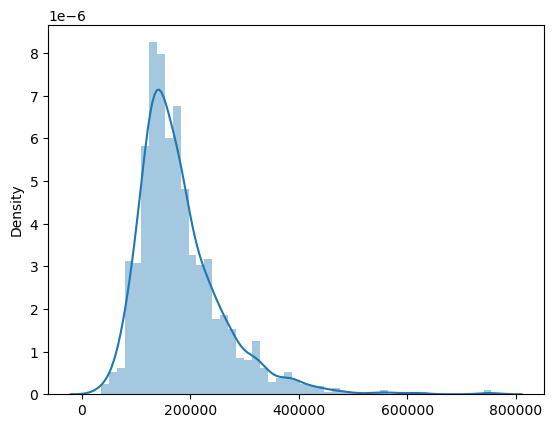

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


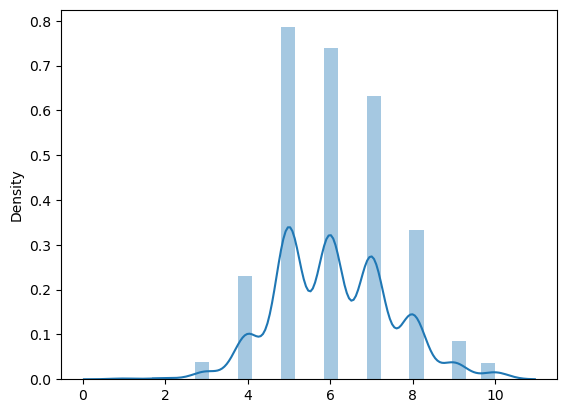

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


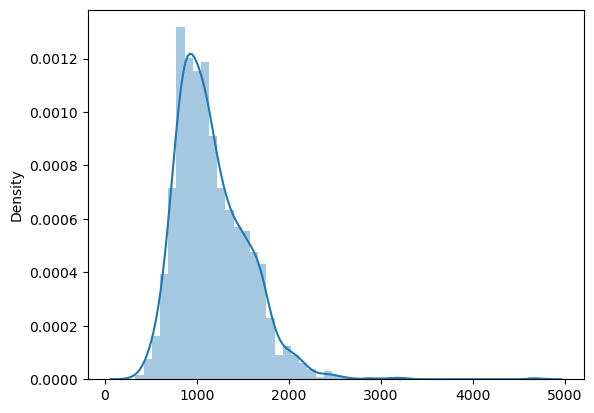

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


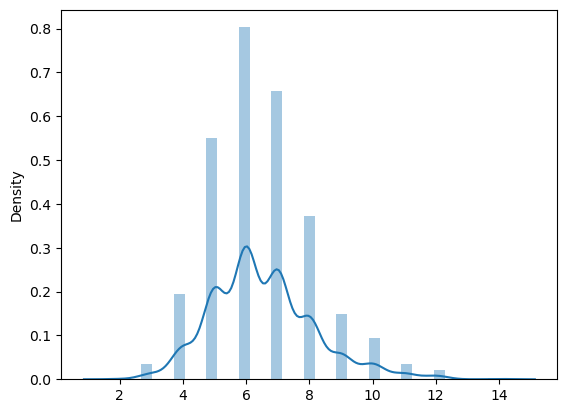

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


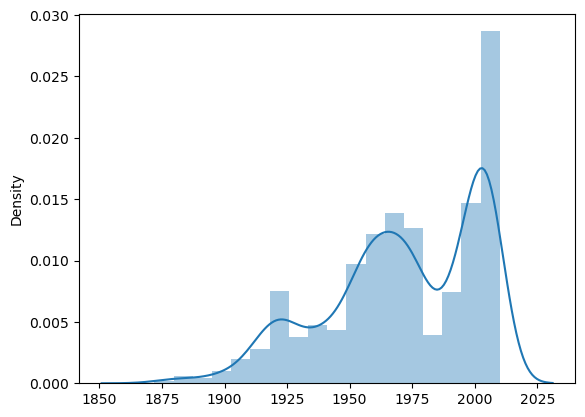

c:\Users\Fernando Sagastume\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


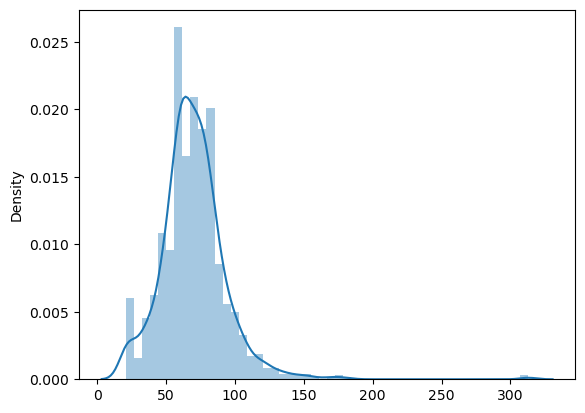

In [5]:
# Se itera sobre cada variable del dataset
for i in range(df.shape[1]):
    sns.distplot(df[:,i])
    plt.show()

### Cálculo de Variable Independiente X
Para este cálculo *X1,X2,X3,X4,X5* son las variables independientes que representan las columnas de *OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt, y LotFrontage*, y la Y la variable dependiente que viene siendo la columna de *SalePrice*.

In [6]:
# Primero se convierte el dataset a un DataFrame, para hacer calculos con "pandas"
dframe = pd.DataFrame(entrenamiento_dataset)
# Luego se agregan nombres a las columnas del dataframe
dframe.columns = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5']

#### Gráfica Xn vs. Y
A continuación se muestran las gráficas de todas las variables independientes contra la dependiente. Viendo las gráficas se puede saber que las que mayor coeficiente de correlación tiene serían: X1 (OverallQual) y X2 (1stFlrSF).

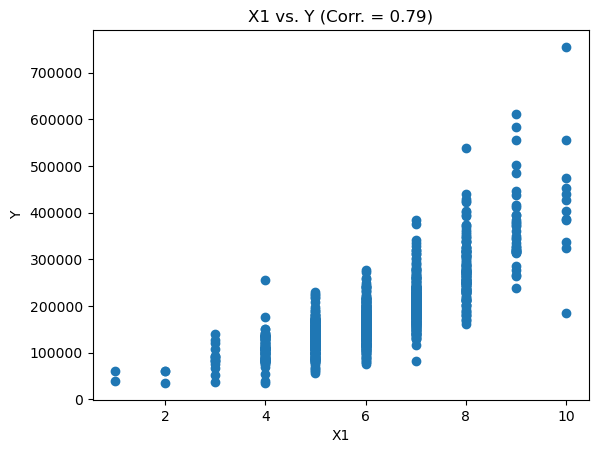

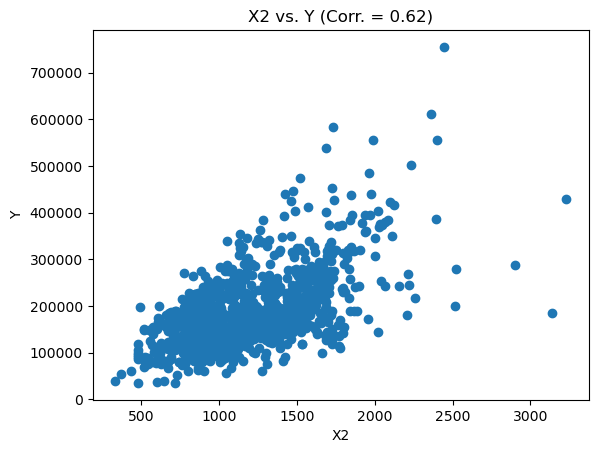

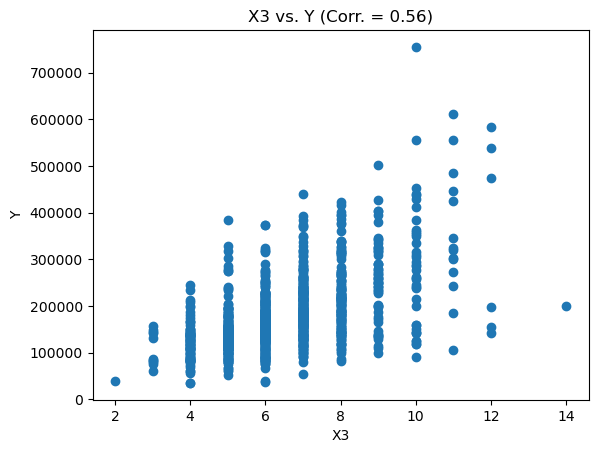

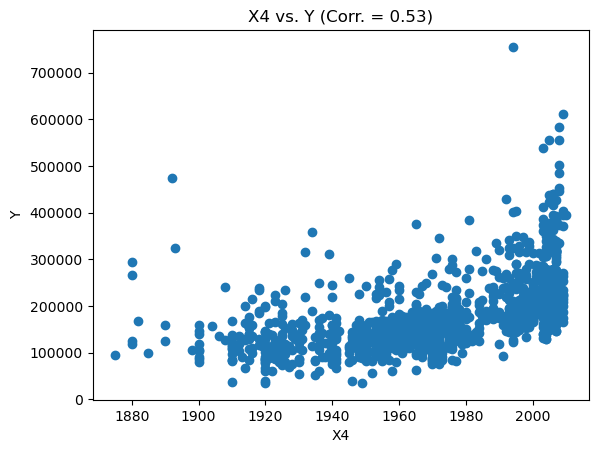

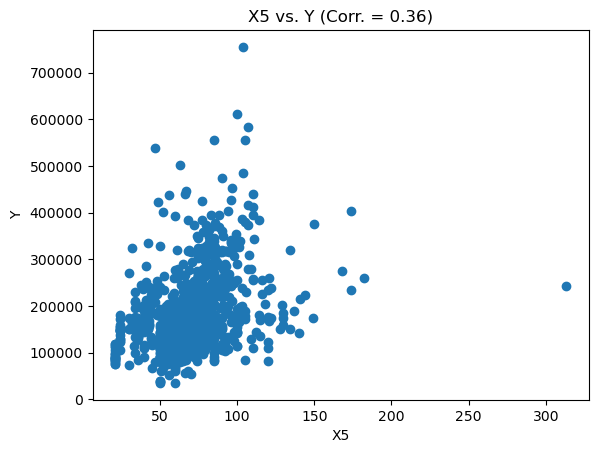

In [7]:
# N indica el número total de variables independientes
N = 5
# Se grafican los resultados del cálculo
for j in range(N):
    X = dframe.iloc[:, j+1]
    Y = dframe.iloc[:, 0]
    plt.scatter(X, Y)
    plt.xlabel(f'X{j+1}')
    plt.ylabel('Y')
    plt.title('X{} vs. Y (Corr. = {:.2f})'.format(j+1, X.corr(Y))) # Se ajusta el coeficiente a dos decimales, por eso el "2f"
    plt.show()
    #Las variables con mayor correlación con la "y" son X1 y X2.

## Función de Regresión Lineal
Función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x.

### Clase para los cálculos de la regresión lineal

In [108]:
class RegresionLineal:

    def __init__(self):
        self.modelos = {}
        self.errores = {}
    
    def entrenar(self, x, y, epochs, print_error_each, learning_rate):

        # ajustar la forma de x
        x = x.reshape(-1, 1)
        # Agregamos una columna de unos para la variable independiente
        X = np.column_stack((x, np.ones(x.shape[0])))
        
        # Inicializamos los parámetros del modelo
        beta = np.zeros((2,1))

        # Seteamos el valor de n que equivale al total de las y
        n = len(y)
        
        for i in range(epochs):

            # Calculamos la predicción del modelo
            y_pred = np.dot(X, beta)
            
            # Calculamos el error
            error = np.mean((y - y_pred) ** 2)
            
            # Calculamos el gradiente
            gradiente_beta = np.dot(X.T, y_pred - y) / n
            
            # Actualizamos los parámetros
            beta = beta - learning_rate * gradiente_beta
            
            # Se almacena el modelo y el error de cada iteración
            self.modelos[i] = beta
            self.errores[i] = error

            # Imprimimos el error cada ciertas iteraciones
            if (i+1) % print_error_each == 0:
                print("Iteración:", i + 1, "Error:", self.errores[i])

    def predecir(self, x):
        # Agregamos una columna de unos para la variable independiente
        X = np.column_stack((x, np.ones(x.shape[0])))
        
        # Concatenamos los betas de los modelos para crear una matriz de coeficientes
        betas = np.concatenate(list(self.modelos.values()), axis=1)

        # Hacemos el producto punto de la matriz de coeficientes con la matriz de características X
        y_pred = np.dot(X, betas)

        # Calculamos la predicción promedio de todos los modelos
        y_prom = np.mean(y_pred, axis=1)

        return y_prom

    def plot_errores(self):
        plt.plot(range(len(self.errores)), self.errores.values())
        plt.xlabel("#Iteración")
        plt.ylabel("Error")
        plt.title("Erorres vs. Iteraciones")
        plt.show()
    
    def plot_modelos(self, n, x, y):
        X = np.column_stack((x, np.ones(x.shape[0])))
        plt.plot(X[:, 0], y, 'b.')
        for i in range(0, len(self.modelos), n):
            beta = self.modelos[i]
            y_pred = np.dot(X, beta)
            plt.plot(X[:, 0], y_pred, label=f'Iteración {i}')
        plt.title('Modelos vs. Iteraciones')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

In [105]:
# Se setean las variables para el entrenamiento con X1
X1_INDEP = dframe["X1"].values
# Se setean las variables para el entrenamiento con X2
X2_INDEP = dframe["X2"].values
# Se setean las variables para el entrenamiento con Y
Y_DEP = dframe["Y"].values

In [109]:
# Se setea la clase de regresión lineal
RL_X1 = RegresionLineal()
RL_X2 = RegresionLineal()

In [102]:
# Se setean los parámetros para las iteraciones de X1
epochs = 1000
print_errors = 100
learning_rate = 0.0005
n_plot_modelos = 100

Iteración: 100 Error: 2458959281.7014275
Iteración: 200 Error: 1789175953.6479065
Iteración: 300 Error: 1769234116.0648725
Iteración: 400 Error: 1760676357.1222713
Iteración: 500 Error: 1752356123.5397332
Iteración: 600 Error: 1744078632.4760249
Iteración: 700 Error: 1735840301.0466478
Iteración: 800 Error: 1727640885.250938
Iteración: 900 Error: 1719480200.2364995
Iteración: 1000 Error: 1711358063.0366116


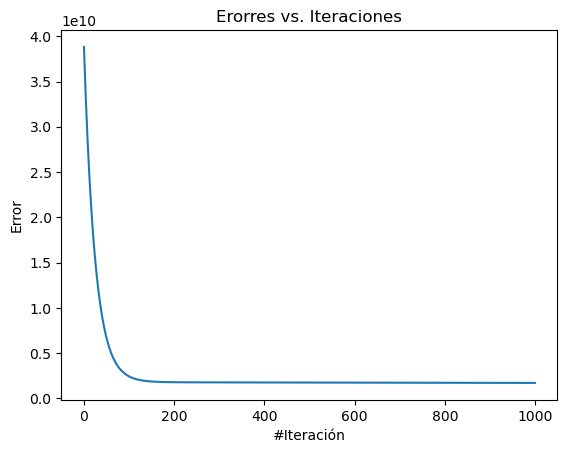

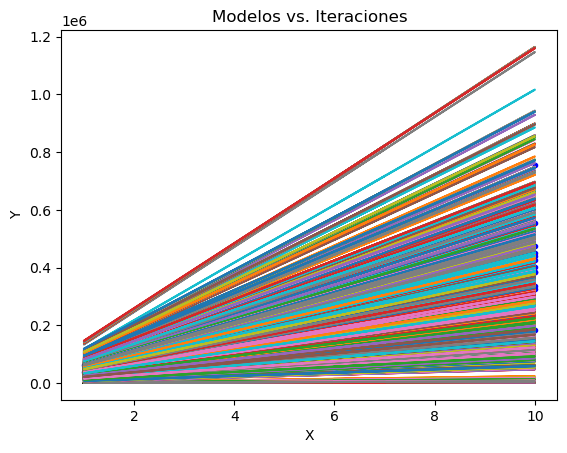

In [111]:
# Se realiza el entrenamiento X1
RL_X1.entrenar(X1_INDEP, Y_DEP, epochs, print_errors, learning_rate)
RL_X1.plot_errores()
RL_X1.plot_modelos(n_plot_modelos, X1_INDEP, Y_DEP)

In [112]:
# Se setean los parámetros para las iteraciones de X2
epochs_1 = 50
print_errors_1 = 1
learning_rate_1 = 0.00000005
n_plot_modelos_1 = 5

Iteración: 1 Error: 38819444106.4435
Iteración: 2 Error: 33820570168.76369
Iteración: 3 Error: 29532617577.713547
Iteración: 4 Error: 25854481730.35605
Iteración: 5 Error: 22699436746.215637
Iteración: 6 Error: 19993090578.58247
Iteración: 7 Error: 17671630942.319344
Iteración: 8 Error: 15680320699.324495
Iteración: 9 Error: 13972207224.705606
Iteración: 10 Error: 12507015322.120024
Iteración: 11 Error: 11250197584.598352
Iteración: 12 Error: 10172119809.537193
Iteración: 13 Error: 9247362260.957026
Iteración: 14 Error: 8454120303.655857
Iteración: 15 Error: 7773690276.955452
Iteración: 16 Error: 7190028485.580625
Iteración: 17 Error: 6689372909.223681
Iteración: 18 Error: 6259918711.174517
Iteración: 19 Error: 5891539894.912568
Iteración: 20 Error: 5575550545.668081
Iteración: 21 Error: 5304500027.324997
Iteración: 22 Error: 5071997305.662334
Iteración: 23 Error: 4872560255.694052
Iteración: 24 Error: 4701486399.96135
Iteración: 25 Error: 4554742029.946678
Iteración: 26 Error: 4428867

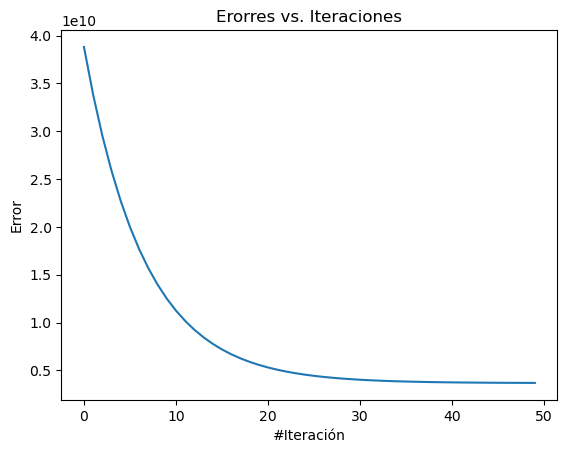

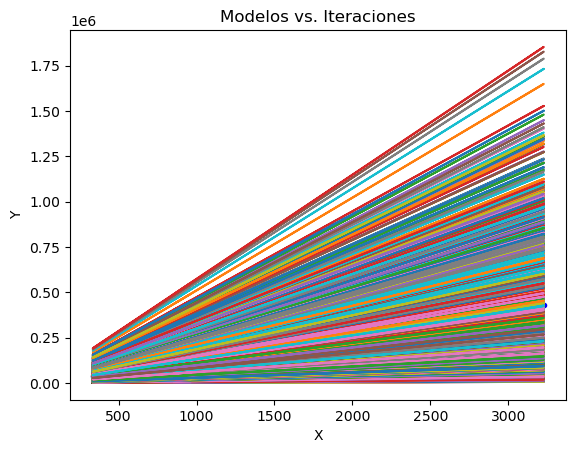

In [113]:
# Se realiza el entrenamiento con X2
RL_X2.entrenar(X2_INDEP, Y_DEP, epochs_1, print_errors_1, learning_rate_1)
RL_X2.plot_errores()
RL_X2.plot_modelos(n_plot_modelos_1, X2_INDEP, Y_DEP)

### Combinando el modelo manual con Sklearn

#### Preparando los set de validación y pruebas para las predicciones

In [59]:
# Primero se convierte el dataset de valiación y pruebas a un DataFrame, para hacer calculos con "pandas"
val_dframe = pd.DataFrame(val_dataset)
pruebas_dframe = pd.DataFrame(pruebas_dataset)
# Luego se agregan nombres a las columnas del dataframe
val_dframe.columns = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5']
pruebas_dframe.columns = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5']
Y_DEP_PRUEBAS = pruebas_dframe["Y"].values

In [114]:
RL_X1.predecir((val_dframe['X1'].values).reshape(-1, 1)) # Haciendo pruebas con la funcion de predecir.

array([161304.80135816, 264734.32238149, 161304.80135816, 161304.80135816,
       187162.18161399, 135447.42110233, 161304.80135816, 213019.56186983,
       135447.42110233, 161304.80135816, 135447.42110233, 135447.42110233,
       187162.18161399, 213019.56186983, 264734.32238149, 135447.42110233,
       135447.42110233, 135447.42110233,  83732.66059066, 213019.56186983,
       187162.18161399, 187162.18161399, 109590.04084649, 213019.56186983,
       135447.42110233, 161304.80135816, 161304.80135816, 161304.80135816,
       187162.18161399, 187162.18161399, 187162.18161399, 109590.04084649,
       109590.04084649, 187162.18161399, 135447.42110233, 187162.18161399,
       135447.42110233, 187162.18161399, 109590.04084649, 161304.80135816,
       135447.42110233, 213019.56186983, 161304.80135816, 213019.56186983,
       109590.04084649, 109590.04084649, 135447.42110233, 135447.42110233,
       161304.80135816, 213019.56186983, 109590.04084649, 161304.80135816,
       135447.42110233, 1

In [115]:
RL_X2.predecir((val_dframe['X2'].values).reshape(-1, 1)) # Haciendo pruebas con la funcion de predecir.

array([131883.19264263, 195370.60118407, 119292.4124613 , 134550.73081664,
        66688.55966982, 174563.80342679, 124840.89186324, 227167.65621827,
        98485.61470402,  87281.95437318,  87495.3574271 , 119932.62162306,
       138498.68731417, 176271.02785816, 257257.4868211 , 120572.83078483,
       167734.90570132, 101259.85440499, 108195.45365742, 173283.38510326,
        88669.07422367, 109689.27503487, 173069.98204934,  81520.07191732,
        89842.79102023, 130602.7743191 ,  70743.21769432,  77678.81694675,
        93790.74751777,  86961.8497923 , 129322.35599558, 147461.61557885,
        92190.22461336,  92403.62766728,  94324.25515257, 173923.59426503,
       114597.54527504, 234316.65852461, 112676.91778976, 181392.70115225,
       136898.16440977, 177124.64007384, 112570.2162628 , 115237.75443681,
        71703.53143696, 102433.57120156, 106594.93075301,  95391.27042217,
       140632.71785338, 140205.91174554,  71703.53143696,  71703.53143696,
        97311.89790746, 1

#### Realizando entrenamientos con Sklearn

In [116]:
# Para la variable X1 se realiza el entrenamiento en Sklearn
# Se crea el objeto LinearRegression
modelos_X1_sklearn = LinearRegression()
# Se devuelve el modelo entrenado
modelos_X1_sklearn.fit(X1_INDEP.reshape(-1, 1), Y_DEP)

LinearRegression()

In [117]:
# Para la variable X1 se realiza el entrenamiento en Sklearn
# Se crea el objeto LinearRegression
modelos_X2_sklearn = LinearRegression()
# Se devuelve el modelo entrenado
modelos_X2_sklearn.fit(X2_INDEP.reshape(-1, 1), Y_DEP)

LinearRegression()

### Realizando predicciones con el modelo manual y el de Sklearn

In [118]:
def predecir_ambos(manual, sklearn: LinearRegression, x):
    # Realizar predicción con modelo entrenado manualmente
    y_pred_manual = manual.predecir(x)
        
     # Realizar predicción con modelo de Scikit-learn
    y_pred_sklearn = sklearn.predict(x)
        
    # Combinar ambas predicciones mediante promedio
    y_pred_total = np.mean([y_pred_manual, y_pred_sklearn], axis=0)
        
    return y_pred_manual, y_pred_sklearn, y_pred_total

In [124]:

def graficar_error(y_pred, y, x_sel):
    error = np.abs(y_pred - y)
    plt.plot(error)
    plt.title('Gráfica del Error')
    plt.xlabel(f'Muestra {x_sel}')
    plt.ylabel('Error Absoluto')
    plt.show()

In [119]:
# Predecimos los valores de ambos modelos con los datos de prueba en X1
y_manual_X1, y_sklearn_X1, y_avg_X1 = predecir_ambos(RL_X1, modelos_X1_sklearn, (pruebas_dframe['X1'].values).reshape(-1, 1))

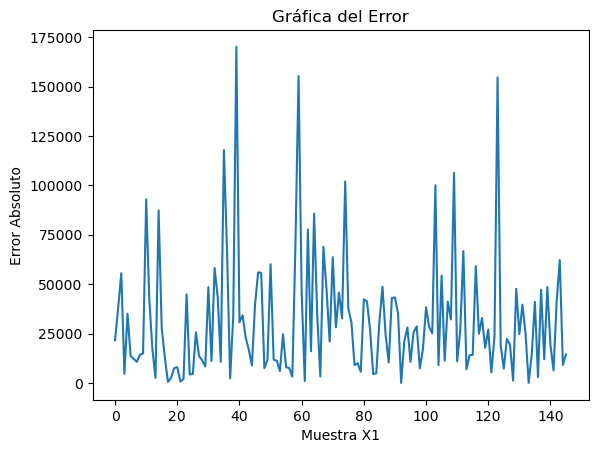

In [125]:
graficar_error(y_avg_X1, Y_DEP_PRUEBAS, 'X1')

In [126]:
mse_x1 = mean_squared_error(y_avg_X1, Y_DEP_PRUEBAS)
rmse_x1 = np.sqrt(mse_x1)
rmse_x1

43657.19025309451

In [127]:
# Predecimos los valores de ambos modelos con los datos de prueba
y_manual_X2, y_sklearn_X2, y_avg_X2 = predecir_ambos(RL_X2, modelos_X2_sklearn, (pruebas_dframe['X2'].values).reshape(-1, 1))

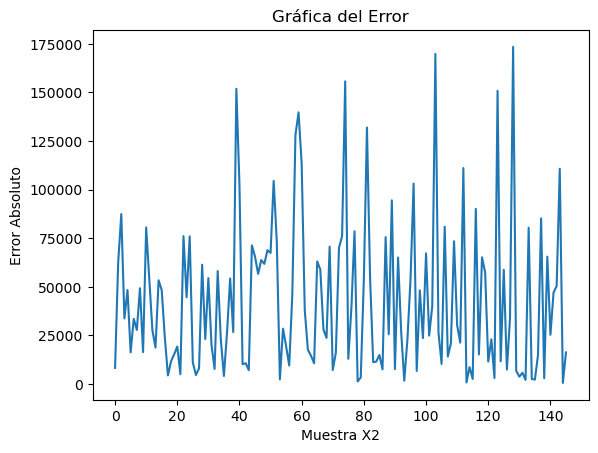

In [128]:
graficar_error(y_avg_X2, Y_DEP_PRUEBAS, 'X2')

In [129]:
mse_x2 = mean_squared_error(y_avg_X2, Y_DEP_PRUEBAS)
rmse_x2 = np.sqrt(mse_x2)
rmse_x2

58088.26155938964